In [1]:
import pandas as pd   
import numpy as np   
import random 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from datetime import datetime
from datetime import timedelta



In [2]:
ph1_res = pd.read_csv('residential_1stLOCKDOWN.csv')
ph1_res

,Unnamed: 0,Region,reg_code,03-10 to 03-30,03-30 to 04-19,04-19 to 05-09,05-09 to 05-29
0,0,Abruzzo,13,0.565961,0.025097,0.536745,0.587421
1,1,Aosta,2,0.500096,0.345851,0.637531,0.690235
2,2,Apulia,16,0.676763,-0.207156,0.617708,0.650967
3,3,Basilicata,17,0.763779,0.438074,0.517227,0.517750
4,4,Calabria,18,0.553372,0.297104,0.494007,0.428200
5,5,Campania,15,0.506401,0.308607,0.598298,0.511511
6,6,Emilia-Romagna,8,0.576950,0.326267,0.534081,0.481818
7,7,Friuli-Venezia Giulia,6,0.589434,0.360741,0.537853,0.479341
8,8,Lazio,12,0.462398,-0.076674,0.421531,0.258747
9,9,Liguria,7,0.463503,-0.176525,0.560701,0.408352


In [3]:
ph1_res = pd.read_csv('residential_1stLOCKDOWN.csv')
ph1_res.drop("Unnamed: 0",axis=1,inplace=True)


ph2_res = pd.read_csv('residential_summer.csv')
ph2_res.drop("Unnamed: 0",axis=1,inplace=True)

ph1_transit = pd.read_csv('transit_1stLOCKDOWN.csv')
ph1_transit.drop("Unnamed: 0",axis=1,inplace=True)


ph2_transit = pd.read_csv('transit_summer.csv')
ph2_transit.drop("Unnamed: 0",axis=1,inplace=True)



In [4]:
len(ph1_res.columns.values.tolist())

6

In [5]:
ph2_res

,Region,reg_code,05-18 to 06-07,06-07 to 06-27,06-27 to 07-17,07-17 to 08-06,08-26 to 09-15,09-15 to 10-06,10-06 to 10-26,10-26 to 11-15
0,Abruzzo,13,0.397298,0.343492,0.156185,0.184079,0.181848,0.082756,0.610357,0.750939
1,Aosta,2,0.372302,0.007272,0.133422,0.138918,-0.105409,0.640649,0.831039,-0.669104
2,Apulia,16,0.481818,0.392264,-0.091430,0.101458,-0.021687,0.129324,0.448962,0.661060
3,Basilicata,17,0.430163,0.043644,-0.116024,0.147247,0.316228,0.025923,0.578787,0.674074
4,Calabria,18,0.418520,-0.016308,-0.064438,-0.120792,0.253546,-0.178539,0.570977,0.496929
5,Campania,15,0.407550,-0.391333,-0.122817,0.010737,-0.353706,0.066314,0.717787,0.257172
6,Emilia-Romagna,8,0.390360,-0.182841,-0.061721,0.174877,-0.470589,0.165512,0.447335,0.536339
7,Friuli-Venezia Giulia,6,0.318550,-0.344703,-0.120885,0.178806,-0.512989,0.441391,0.427327,0.476851
8,Lazio,12,0.493216,-0.413725,-0.221605,-0.060970,-0.368288,0.010230,0.328007,0.295059
9,Liguria,7,0.005115,-0.162987,0.047000,-0.047019,-0.411476,0.338099,0.721615,-0.366423


In [6]:
data = [(ph1_res.iloc[:, [i]]) for i in range(2,len(ph1_res.columns.values.tolist()))]
data.extend([(ph2_res.iloc[:, [i]]) for i in range(2,len(ph2_res.columns.values.tolist()))])
data


[    03-10 to 03-30
 0         0.565961
 1         0.500096
 2         0.676763
 3         0.763779
 4         0.553372
 5         0.506401
 6         0.576950
 7         0.589434
 8         0.462398
 9         0.463503
 10        0.512131
 11        0.199561
 12        0.800089
 13        0.525339
 14        0.607721
 15        0.644063
 16        0.555566
 17       -0.117095
 18        0.586041,
     03-30 to 04-19
 0         0.025097
 1         0.345851
 2        -0.207156
 3         0.438074
 4         0.297104
 5         0.308607
 6         0.326267
 7         0.360741
 8        -0.076674
 9        -0.176525
 10       -0.250742
 11       -0.248953
 12        0.482104
 13       -0.108976
 14        0.228767
 15       -0.166181
 16        0.203655
 17        0.332802
 18        0.323669,
     04-19 to 05-09
 0         0.536745
 1         0.637531
 2         0.617708
 3         0.517227
 4         0.494007
 5         0.598298
 6         0.534081
 7         0.537853
 8         0.42153

In [7]:
np.array(ph1_res.iloc[:, [0]]).flatten()

array(['Abruzzo', 'Aosta', 'Apulia', 'Basilicata', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli-Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardy', 'Marche', 'Molise', 'Piedmont', 'Sardinia', 'Sicily',
       'Tuscany', 'Umbria', 'Veneto'], dtype=object)

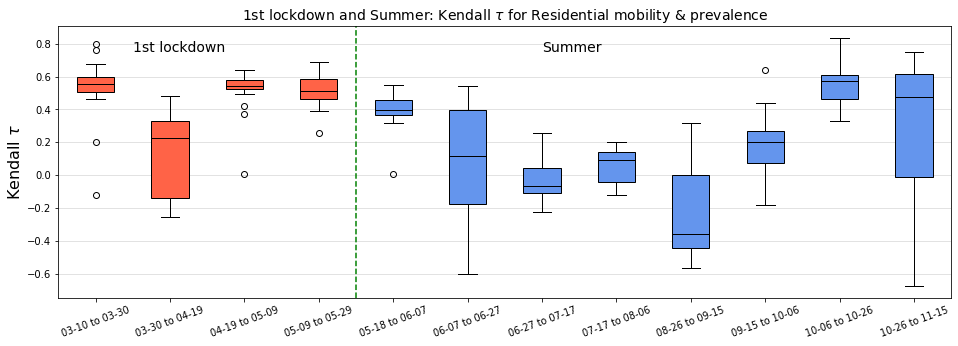

In [8]:
plt.figure(figsize=(16,5))

ncols_ph1 =  len(ph1_res.columns.values.tolist()[2:])
ncols_ph2 =  len(ph2_res.columns.values.tolist()[2:])

colnames_ph1 = ph1_res.columns.values.tolist()[2:]
colnames_ph2 = ph2_res.columns.values.tolist()[2:]


data = [np.array(ph1_res.iloc[:, [i]]).flatten() for i in range(2,ncols_ph1+2)]
data.extend([np.array(ph2_res.iloc[:, [i]]).flatten() for i in range(2,ncols_ph2+2)])

box = plt.boxplot(data, patch_artist=True)

colors = ['tomato']*ncols_ph1+['cornflowerblue']*ncols_ph2
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
for patch in box['medians']:
    patch.set_color('black')
    #patch.set_median(color='black')
    
    
    

#plt.ylim([-0.45,0.65])
plt.xticks(ticks=range(1,ncols_ph1+ncols_ph2+1),labels=colnames_ph1 + colnames_ph2,size=9.6,rotation=20 )

plt.axvline(x=4.5,color='green',linestyle='--')
plt.text(1.5,0.75,"1st lockdown",size=14)
plt.text(7,0.75,"Summer",size=14)
plt.title("1st lockdown and Summer: Kendall $\\tau$ for Residential mobility & prevalence",size=14)
plt.ylabel("Kendall $\\tau$",size=16)
plt.grid(axis='y', linestyle='-', which='major', color='lightgrey', alpha=0.8)
plt.savefig("ph12_residential.png")
plt.show()

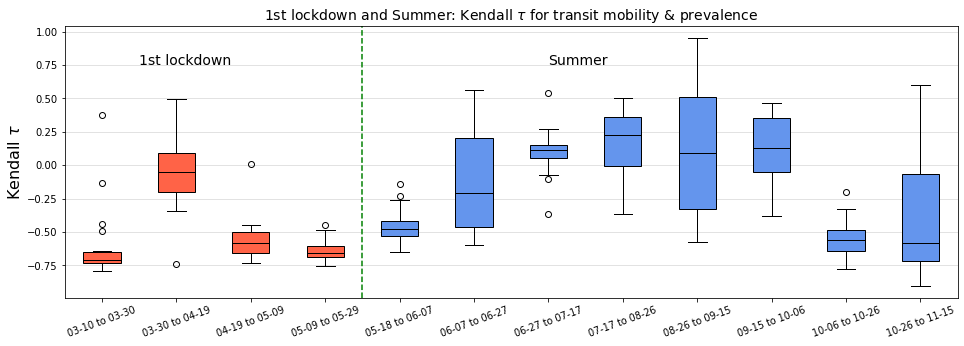

In [9]:
plt.figure(figsize=(16,5))

ncols_ph1 =  len(ph1_transit.columns.values.tolist()[2:])
ncols_ph2 =  len(ph2_transit.columns.values.tolist()[2:])

colnames_ph1 = ph1_transit.columns.values.tolist()[2:]
colnames_ph2 = ph2_transit.columns.values.tolist()[2:]


data = [np.array(ph1_transit.iloc[:, [i]]).flatten() for i in range(2,ncols_ph1+2)]
data.extend([np.array(ph2_transit.iloc[:, [i]]).flatten() for i in range(2,ncols_ph2+2)])

box = plt.boxplot(data, patch_artist=True)

colors = ['tomato']*ncols_ph1+['cornflowerblue']*ncols_ph2
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
for patch in box['medians']:
    patch.set_color('black')
    #patch.set_median(color='black')
    
    
    

#plt.ylim([-0.45,0.65])
plt.xticks(ticks=range(1,ncols_ph1+ncols_ph2+1),labels=colnames_ph1 + colnames_ph2,size=9.6,rotation=20 )

plt.axvline(x=4.5,color='green',linestyle='--')
plt.text(1.5,0.75,"1st lockdown",size=14)
plt.text(7,0.75,"Summer",size=14)
plt.title("1st lockdown and Summer: Kendall $\\tau$ for transit mobility & prevalence",size=14)
plt.ylabel("Kendall $\\tau$",size=16)
plt.grid(axis='y', linestyle='-', which='major', color='lightgrey', alpha=0.8)
plt.savefig("ph12_transit.png")
plt.show()

In [10]:
ph2_res

,Region,reg_code,05-18 to 06-07,06-07 to 06-27,06-27 to 07-17,07-17 to 08-06,08-26 to 09-15,09-15 to 10-06,10-06 to 10-26,10-26 to 11-15
0,Abruzzo,13,0.397298,0.343492,0.156185,0.184079,0.181848,0.082756,0.610357,0.750939
1,Aosta,2,0.372302,0.007272,0.133422,0.138918,-0.105409,0.640649,0.831039,-0.669104
2,Apulia,16,0.481818,0.392264,-0.091430,0.101458,-0.021687,0.129324,0.448962,0.661060
3,Basilicata,17,0.430163,0.043644,-0.116024,0.147247,0.316228,0.025923,0.578787,0.674074
4,Calabria,18,0.418520,-0.016308,-0.064438,-0.120792,0.253546,-0.178539,0.570977,0.496929
5,Campania,15,0.407550,-0.391333,-0.122817,0.010737,-0.353706,0.066314,0.717787,0.257172
6,Emilia-Romagna,8,0.390360,-0.182841,-0.061721,0.174877,-0.470589,0.165512,0.447335,0.536339
7,Friuli-Venezia Giulia,6,0.318550,-0.344703,-0.120885,0.178806,-0.512989,0.441391,0.427327,0.476851
8,Lazio,12,0.493216,-0.413725,-0.221605,-0.060970,-0.368288,0.010230,0.328007,0.295059
9,Liguria,7,0.005115,-0.162987,0.047000,-0.047019,-0.411476,0.338099,0.721615,-0.366423


In [11]:
ph2_transit

,Region,reg_code,05-18 to 06-07,06-07 to 06-27,06-27 to 07-17,07-17 to 08-26,08-26 to 09-15,09-15 to 10-06,10-06 to 10-26,10-26 to 11-15
0,Abruzzo,13,-0.650619,-0.363206,-0.068796,0.255428,-0.571429,0.464716,-0.558408,-0.798114
1,Aosta,2,-0.445299,0.090269,0.116934,0.329750,0.948683,-0.382595,-0.559745,0.599097
2,Apulia,16,-0.458673,-0.421319,0.157643,0.388499,-0.307707,0.317080,-0.579214,-0.692889
3,Basilicata,17,-0.426044,0.010534,0.113872,0.430048,-0.316228,0.429350,-0.372935,-0.615100
4,Calabria,18,-0.581951,0.124635,0.268296,0.481753,-0.500000,0.421368,-0.637455,-0.469801
5,Campania,15,-0.537570,0.419557,0.151794,0.222906,0.061381,0.278829,-0.663612,-0.449691
6,Emilia-Romagna,8,-0.517227,0.236594,0.084883,-0.080525,0.298396,0.396540,-0.512620,-0.782691
7,Friuli-Venezia Giulia,6,-0.227793,0.297575,0.055558,-0.049034,0.497930,-0.108439,-0.197162,-0.579214
8,Lazio,12,-0.502468,0.415798,0.053240,-0.362179,0.605414,0.259262,-0.522478,-0.634230
9,Liguria,7,-0.141062,0.178318,0.053791,-0.019610,-0.029277,-0.252475,-0.776845,0.249479
